# Análise exploratória de dados

In [38]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.append('r')

[nltk_data] Downloading package punkt to /home/cmatheus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cmatheus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Descrição dos dados

In [39]:
data = pd.read_csv("../data/interim/data.csv")
data.head()

text    datetime  category  \
0  Kátia Abreu diz que vai colocar sua expulsão e...  2017-11-30  politica   
1  Dr. Ray peita Bolsonaro, chama-o de conservad...  2017-11-24  politica   
2  Reinaldo Azevedo desmascarado pela Polícia Fed...  2017-05-23  politica   
3  Relatório assustador do BNDES mostra dinheiro ...  24/07/2017  politica   
4  Radialista americano fala sobre o PT: "Eles ve...  25/07/2017  politica   

  label  
0  fake  
1  fake  
2  fake  
3  fake  
4  fake

In [40]:
print("[INFO] Tamanho do dataset: ")
print("--------------- Linhas {}".format(data.shape[0]))
print("--------------- Colunas {}".format(data.shape[1]))

[INFO] Tamanho do dataset: 
--------------- Linhas 7200
--------------- Colunas 4


In [41]:
print("[INFO] Tipo das variaveis: ")
print(data.info())

[INFO] Tipo das variaveis: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      7200 non-null   object
 1   datetime  7200 non-null   object
 2   category  7200 non-null   object
 3   label     7200 non-null   object
dtypes: object(4)
memory usage: 225.1+ KB
None


In [42]:
# checando a coluna text
print(data.text.head(1))

0    Kátia Abreu diz que vai colocar sua expulsão e...
Name: text, dtype: object


Possiveis tratamentos:
* colocar todas palavras como minusculas
* remover pontuações,links, emojis 
* remover stopwords

In [43]:
# checando coluna datetime
data.datetime.head(15)

0     2017-11-30
1     2017-11-24
2     2017-05-23
3     24/07/2017
4     25/07/2017
5     25/07/2017
6     21/07/2017
7     20/07/2017
8     21/07/2017
9     20/07/2017
10    22/07/2017
11    21/07/2017
12    21/07/2017
13    2017-05-22
14    19/07/2017
Name: datetime, dtype: object

Tratamentos: 
* Deixar todos no mesmo formato
* passar o tipo datetime

In [44]:
# checando coluna category
data.category.head(15)

0                politica
1                politica
2                politica
3                politica
4                politica
5         tv_celebridades
6     sociedade_cotidiano
7                politica
8                politica
9                politica
10    sociedade_cotidiano
11               politica
12        tv_celebridades
13               politica
14               politica
Name: category, dtype: object

Acredito não ter que fazer tramentos neste caso, levar duvida quarta-feira

In [45]:
# checando coluna label
data.label.head(15)

0     fake
1     fake
2     fake
3     fake
4     fake
5     fake
6     fake
7     fake
8     fake
9     fake
10    fake
11    fake
12    fake
13    fake
14    fake
Name: label, dtype: object

In [46]:
data.label.tail(15)

7185    true
7186    true
7187    true
7188    true
7189    true
7190    true
7191    true
7192    true
7193    true
7194    true
7195    true
7196    true
7197    true
7198    true
7199    true
Name: label, dtype: object

Tratamento:
* encoding desta coluna
* Acrescentar no dicionario de dados apos o encoding

In [47]:
#tratamento da coluna text
data["clean_text_01"] = data["text"].apply(lambda x : x.lower())

In [48]:
data["clean_text_01"] = data["clean_text_01"].apply(lambda x : re.sub('[^\w\s]', '', x))

In [49]:
data["date"] = data["datetime"].apply(lambda x :x.replace(" de ", "/"))

In [50]:
data["date"] = data["date"].apply(lambda x :x.replace("-", "/"))

In [51]:
from datetime import datetime

In [52]:
mes = {
    "janeiro": '01',
    "fevereiro": '02',
    "março": '03',
    "abril": '04',
    "maio": '05',
    "junho": '06',
    "julho": '07',
    "agosto": '08',
    "setembro": '09',
    "outubro": '10',
    "novembro": '11',
    "dezembro": '12',
}

In [53]:
datas = []
for i in data.date:
    d = i.split('/')
    if d[1] in mes:
        d[1] = mes[d[1]]
    datas.append('/'.join(d))
len(datas)

7200

In [54]:
datas

['2017/11/30',
 '2017/11/24',
 '2017/05/23',
 '24/07/2017',
 '25/07/2017',
 '25/07/2017',
 '21/07/2017',
 '20/07/2017',
 '21/07/2017',
 '20/07/2017',
 '22/07/2017',
 '21/07/2017',
 '21/07/2017',
 '2017/05/22',
 '19/07/2017',
 '19/07/2017',
 '21/07/2017',
 '20/07/2017',
 '21/07/2017',
 '22/07/2017',
 '18/07/2017',
 '18/07/2017',
 '18/07/2017',
 '18/07/2017',
 '2017/05/22',
 '18/07/2017',
 '19/07/2017',
 '15/07/2017',
 '16/07/2017',
 '16/07/2017',
 '16/07/2017',
 '17/07/2017',
 '17/07/2017',
 '17/07/2017',
 '12/07/2017',
 '2017/05/22',
 '12/07/2017',
 '13/07/2017',
 '13/07/2017',
 '13/07/2017',
 '14/07/2017',
 '14/07/2017',
 '11/07/2017',
 '12/07/2017',
 '12/07/2017',
 '11/07/2017',
 '2017/05/22',
 '12/07/2017',
 '12/07/2017',
 '08/07/2017',
 '08/07/2017',
 '09/07/2017',
 '08/07/2017',
 '10/07/2017',
 '11/07/2017',
 '08/07/2017',
 '07/07/2017',
 '2017/05/21',
 '07/07/2017',
 '08/07/2017',
 '08/07/2017',
 '08/07/2017',
 '08/07/2017',
 '07/07/2017',
 '06/07/2017',
 '07/07/2017',
 '07/07/20

In [55]:
data["date"] = datas

In [56]:
#data['new_data'] = pd.to_datetime(data.new_data, infer_datetime_format=True,errors = 'coerce')

In [57]:
#data["date_test"] = pd.to_datetime(data["datetime"], infer_datetime_format=True,errors = 'coerce')

In [58]:
#data["date_clean"] = data["date_test"].apply(lambda x : if x is not pd.NaT x.strftime("%d/%m/%Y") else ) 

In [59]:
aux=data[data.date.isna()]
aux

Empty DataFrame
Columns: [text, datetime, category, label, clean_text_01, date]
Index: []

In [60]:
certas = []
erradas = []

for k,v in enumerate(data.date):
    try:
        certas.append(pd.to_datetime(pd.Series(v)))
    except:
        data.drop(index=k, inplace=True)


/tmp/ipykernel_4390/178262930.py:6: UserWarning: Parsing '24/07/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  certas.append(pd.to_datetime(pd.Series(v)))
/tmp/ipykernel_4390/178262930.py:6: UserWarning: Parsing '25/07/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  certas.append(pd.to_datetime(pd.Series(v)))
/tmp/ipykernel_4390/178262930.py:6: UserWarning: Parsing '25/07/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  certas.append(pd.to_datetime(pd.Series(v)))
/tmp/ipykernel_4390/178262930.py:6: UserWarning: Parsing '21/07/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  certas.append(pd.to_datetime(pd.Series(v)))
/tmp/ipykernel_4390/178262930.py:6: UserWarning: Parsing '20/07/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=

In [61]:
certas = [i.to_string().split()[1] for i in certas]

In [62]:
certas

['2017-11-30',
 '2017-11-24',
 '2017-05-23',
 '2017-07-24',
 '2017-07-25',
 '2017-07-25',
 '2017-07-21',
 '2017-07-20',
 '2017-07-21',
 '2017-07-20',
 '2017-07-22',
 '2017-07-21',
 '2017-07-21',
 '2017-05-22',
 '2017-07-19',
 '2017-07-19',
 '2017-07-21',
 '2017-07-20',
 '2017-07-21',
 '2017-07-22',
 '2017-07-18',
 '2017-07-18',
 '2017-07-18',
 '2017-07-18',
 '2017-05-22',
 '2017-07-18',
 '2017-07-19',
 '2017-07-15',
 '2017-07-16',
 '2017-07-16',
 '2017-07-16',
 '2017-07-17',
 '2017-07-17',
 '2017-07-17',
 '2017-12-07',
 '2017-05-22',
 '2017-12-07',
 '2017-07-13',
 '2017-07-13',
 '2017-07-13',
 '2017-07-14',
 '2017-07-14',
 '2017-11-07',
 '2017-12-07',
 '2017-12-07',
 '2017-11-07',
 '2017-05-22',
 '2017-12-07',
 '2017-12-07',
 '2017-08-07',
 '2017-08-07',
 '2017-09-07',
 '2017-08-07',
 '2017-10-07',
 '2017-11-07',
 '2017-08-07',
 '2017-07-07',
 '2017-05-21',
 '2017-07-07',
 '2017-08-07',
 '2017-08-07',
 '2017-08-07',
 '2017-08-07',
 '2017-07-07',
 '2017-06-07',
 '2017-07-07',
 '2017-07-

In [63]:
new_date = []
for i in certas:
    new_date.append('/'.join(i.split('-')[::-1]))
data['date'] = new_date

In [64]:
data['date_new'] = data['date'].astype({'date': 'datetime64[ns]'})

/home/cmatheus/.cache/pypoetry/virtualenvs/src-xnpi0OAp-py3.8/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '30/11/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/cmatheus/.cache/pypoetry/virtualenvs/src-xnpi0OAp-py3.8/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '24/11/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/cmatheus/.cache/pypoetry/virtualenvs/src-xnpi0OAp-py3.8/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '23/05/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/cmatheus/.cac

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   text           7197 non-null   object        
 1   datetime       7197 non-null   object        
 2   category       7197 non-null   object        
 3   label          7197 non-null   object        
 4   clean_text_01  7197 non-null   object        
 5   date           7197 non-null   object        
 6   date_new       7197 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 449.8+ KB


In [66]:
data

text  \
0     Kátia Abreu diz que vai colocar sua expulsão e...   
1     Dr. Ray peita Bolsonaro, chama-o de conservad...   
2     Reinaldo Azevedo desmascarado pela Polícia Fed...   
3     Relatório assustador do BNDES mostra dinheiro ...   
4     Radialista americano fala sobre o PT: "Eles ve...   
...                                                 ...   
7195  Para jornal britânico, ação contra Lula na Lav...   
7196  Temer diz que acionou PF e Cade para investiga...   
7197  Os obstáculos políticos de Temer em 2017. Espe...   
7198  Sexta-feira, 15 de setembro de 2017. Boa noite...   
7199  'Não me envolvo em política', diz brasileiro q...   

                    datetime             category label  \
0                 2017-11-30             politica  fake   
1                 2017-11-24             politica  fake   
2                 2017-05-23             politica  fake   
3                 24/07/2017             politica  fake   
4                 25/07/2017             politica  fake   
...                      ...                  ...   ...   
7195  22 de novembro de 2016             politica  true   
7196        09/02/2018 08h25             politica  true   
7197        31/12/2016 05h00             politica  true   
7198        15/09/2017 20h46  sociedade_cotidiano  true   
7199        08/01/2018 11h58      tv_celebridades  true   

                                          clean_text_01        date   date_new  
0     kátia abreu diz que vai colocar sua expulsão e...  30/11/2017 2017-11-30  
1     dr ray peita bolsonaro chamao de conservador f...  24/11/2017 2017-11-24  
2     reinaldo azevedo desmascarado pela polícia fed...  23/05/2017 2017-05-23  
3     relatório assustador do bndes mostra dinheiro ...  24/07/2017 2017-07-24  
4     radialista americano fala sobre o pt eles vend...  25/07/2017 2017-07-25  
...                                                 ...         ...        ...  
7195  para jornal britânico ação contra lula na lava...  22/11/2016 2016-11-22  
7196  temer diz que acionou pf e cade para investiga...  02/09/2018 2018-02-09  
7197  os obstáculos políticos de temer em 2017 espec...  31/12/2016 2016-12-31  
7198  sextafeira 15 de setembro de 2017 boa noite aq...  15/09/2017 2017-09-15  
7199  não me envolvo em política diz brasileiro que ...  01/08/2018 2018-01-08  

[7197 rows x 7 columns]

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   text           7197 non-null   object        
 1   datetime       7197 non-null   object        
 2   category       7197 non-null   object        
 3   label          7197 non-null   object        
 4   clean_text_01  7197 non-null   object        
 5   date           7197 non-null   object        
 6   date_new       7197 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 449.8+ KB


In [68]:
data['date_new']

0      2017-11-30
1      2017-11-24
2      2017-05-23
3      2017-07-24
4      2017-07-25
          ...    
7195   2016-11-22
7196   2018-02-09
7197   2016-12-31
7198   2017-09-15
7199   2018-01-08
Name: date_new, Length: 7197, dtype: datetime64[ns]

In [69]:
data['date_analysis'] = pd.to_datetime(data['date'], format='%d/%m/%Y')


In [70]:
data["mes"] = data['date_analysis'].dt.month

In [71]:
def remove_stopword(old):
    retorno= ""
    palavras = nltk.word_tokenize(old)
    nova = [palavra for palavra in palavras if palavra not in stopwords]
    retorno= ' '.join(nova)
    return retorno

In [72]:
data["clean_text_02"] = data["clean_text_01"].apply(lambda x: remove_stopword(x))

## 2. Perguntas de partida e hipóteses

## Possiveis perguntas:
* Meses com as maiores frequencias de fake news ?
* Qual a categoria com maior taxa de fake news ?
* Tamanho medio da noticia.
* Palavras com maiores frequencias de fake news ?

In [73]:
fake = data[data["label"]=="fake"]
true = data[data["label"]=="true"]

In [74]:
# Meses com maiores frequencias de fake news e true news
group_date_true = true.groupby('date_new')['label'].count().reset_index()
group_date_true.set_index("date_new",inplace=True)
df_true_label = group_date_true.resample('M').sum().reset_index().rename(columns = {'date_new':'date', 'label':'count_label'})
df_true_label["mes"] = df_true_label['date'].dt.month



group_date_fake = fake.groupby('date_new')['label'].count().reset_index()
group_date_fake.set_index("date_new",inplace=True)
df_fake_label = group_date_fake.resample('M').sum().reset_index().rename(columns = {'date_new':'date', 'label':'count_label'})
df_fake_label["mes"] = df_fake_label['date'].dt.month

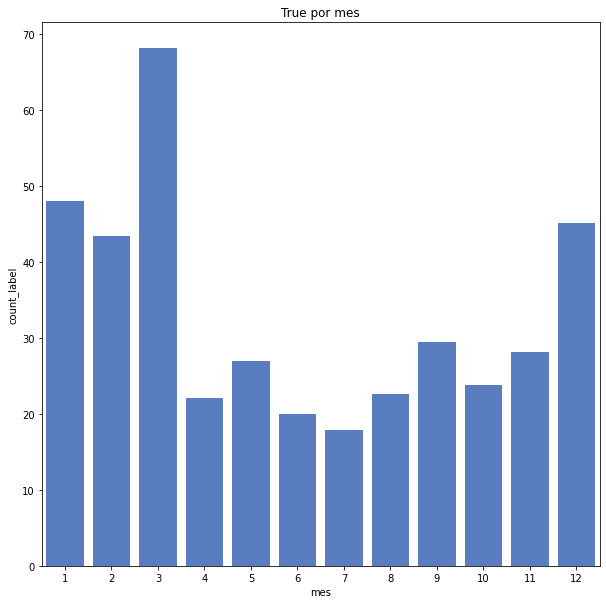

In [75]:
plt.subplots(figsize=(10, 10))
sns.set_color_codes("muted")
plt.title("True por mes")
sns.barplot(x="mes", y="count_label", data=df_true_label, color="b",hue_order="mes",ci=False)
plt.show()

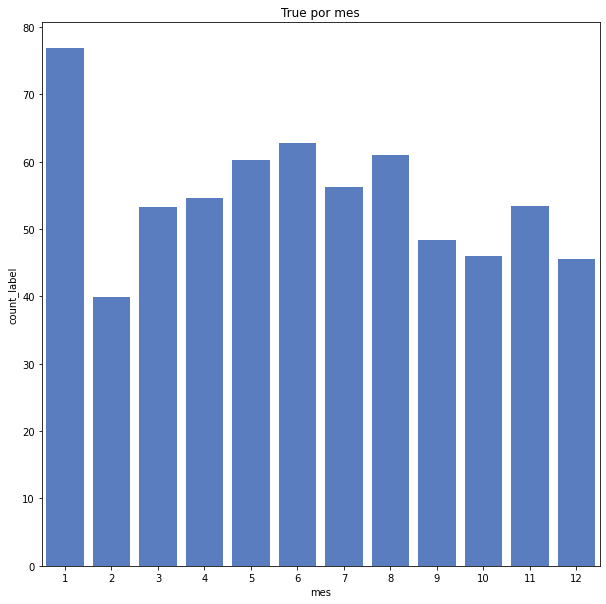

In [76]:
plt.subplots(figsize=(10, 10))
sns.set_color_codes("muted")
plt.title("True por mes")
sns.barplot(x="mes", y="count_label", data=df_fake_label, color="b",ci=False)
plt.show()

In [77]:
group_date_true_y = true.groupby('date_new')['label'].count().reset_index()
group_date_true_y.set_index("date_new",inplace=True)
df_true_label_y = group_date_true_y.resample('Y').sum().reset_index().rename(columns = {'date_new':'date', 'label':'count_label'})
df_true_label_y["ano"] = df_true_label_y['date'].dt.year



group_date_fake_y = fake.groupby('date_new')['label'].count().reset_index()
group_date_fake_y.set_index("date_new",inplace=True)
df_fake_label_y = group_date_fake_y.resample('Y').sum().reset_index().rename(columns = {'date_new':'date', 'label':'count_label'})
df_fake_label_y["ano"] = df_fake_label_y['date'].dt.year

In [78]:
df_fake_label_y

date  count_label   ano
0 2012-12-31            1  2012
1 2013-12-31            0  2013
2 2014-12-31            0  2014
3 2015-12-31          235  2015
4 2016-12-31         1586  2016
5 2017-12-31         1608  2017
6 2018-12-31          169  2018

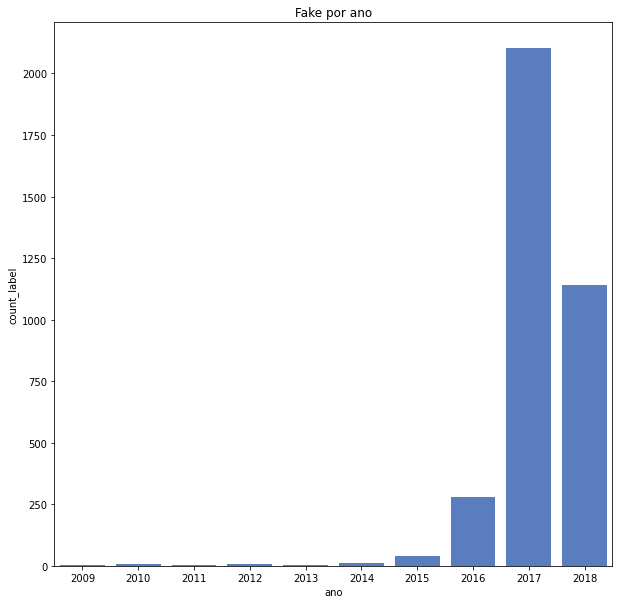

In [79]:
plt.subplots(figsize=(10, 10))
sns.set_color_codes("muted")
plt.title("Fake por ano")
sns.barplot(x="ano", y="count_label", data=df_true_label_y, color="b",ci=False)
plt.show()

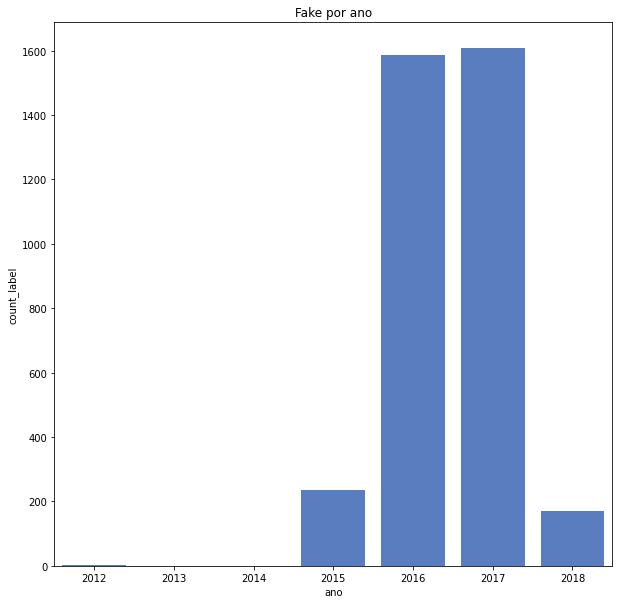

In [80]:
plt.subplots(figsize=(10, 10))
sns.set_color_codes("muted")
plt.title("Fake por ano")
sns.barplot(x="ano", y="count_label", data=df_fake_label_y, color="b",ci=False)
plt.show()

Mensalmente podemos tirar poucas informações sobre a taxa de fake news , mas anualmente tivemos o insight positivo que a maior taxa fake news foi contabilizada no ano de 2016 e 2017, porém 2018 tivemos uma queda significativa na mesma.

In [81]:
#Qual a categoria com maior taxa de fake news ?
group_category_true = true.groupby('category').count().reset_index()
group_category_fake = fake.groupby('category').count().reset_index()


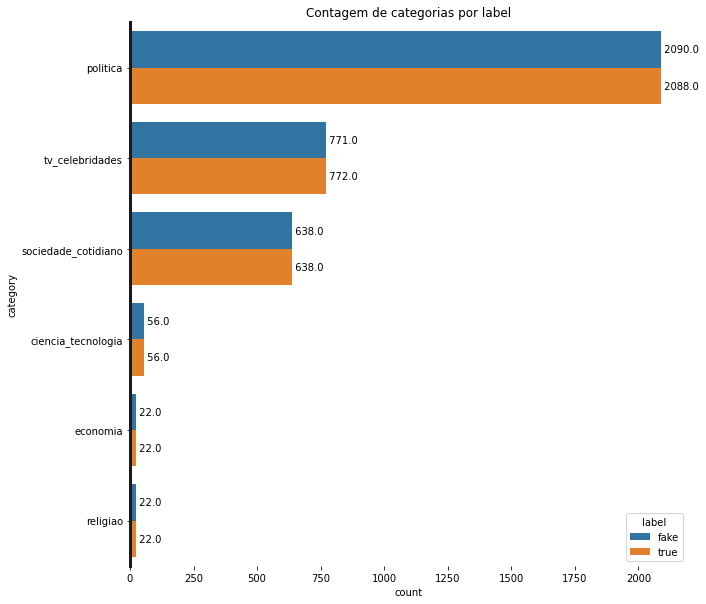

In [82]:
plt.subplots(figsize=(10, 10))

plt.title("Contagem de categorias por label")
ax = sns.countplot(data=data,y="category",hue="label")
ax.bar_label(
    ax.containers[0],
    fmt=' %.1f',
    label_type='edge',
    color='black'
)
ax.bar_label(
    ax.containers[1],
    fmt=' %.1f',
    label_type='edge',
    color='black'
)
ax.set(frame_on=False)
ax.axvline(0, color="k",linewidth = 3, clip_on=False)
plt.show()

In [83]:
#Tamanho medio da noticia
true["tam_noticia"] = true["text"].apply(lambda x: len(x))

/tmp/ipykernel_4390/3761118097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true["tam_noticia"] = true["text"].apply(lambda x: len(x))


In [84]:
fake["tam_noticia"] = fake["text"].apply(lambda x: len(x))

/tmp/ipykernel_4390/881937606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake["tam_noticia"] = fake["text"].apply(lambda x: len(x))


In [85]:
fake.describe()

mes   tam_noticia
count  3599.000000   3599.000000
mean      6.242567   1124.150042
std       3.453142    769.557378
min       1.000000     46.000000
25%       3.000000    696.000000
50%       6.000000    956.000000
75%       9.000000   1356.000000
max      12.000000  13280.000000

In [86]:
true.describe()

mes   tam_noticia
count  3598.000000   3598.000000
mean      6.204280   6675.526959
std       3.651592   4133.795396
min       1.000000    114.000000
25%       3.000000   3873.000000
50%       6.000000   5583.500000
75%       9.000000   8598.000000
max      12.000000  46084.000000

Gráfico:

In [87]:
pd.concat([true,fake])

text          datetime  \
3600  ﻿O Podemos decidiu  expulsar o deputado federa...        13/12/2017   
3601  Bolsonaro é um liberal completo, diz president...         12/1/2018   
3602  Ministro do STF libera Andrea Neves de prisão ...         7/12/2017   
3603  Apesar da abundância, cresce preocupação com p...  31/10/2017 10h17   
3604  Por que Harvard e MIT levarão Dilma, Moro e Su...  05/04/2017 09h08   
...                                                 ...               ...   
3595  FT: "O julgamento de um populista que usou din...        23/07/2017   
3596  Nota fiscal emitida pela Petrobras mostra que ...        24/07/2017   
3597  Estão estancando a sangria da "Lava-Jato" bem ...        24/07/2017   
3598  (RJ) Cidadão finge estar possuído pela "pomba ...        24/07/2017   
3599  Autor de best-seller cita 5 expressões que ind...        23/07/2017   

                 category label  \
3600             politica  true   
3601             politica  true   
3602             politica  true   
3603             politica  true   
3604             politica  true   
...                   ...   ...   
3595             politica  fake   
3596             politica  fake   
3597             politica  fake   
3598  sociedade_cotidiano  fake   
3599      tv_celebridades  fake   

                                          clean_text_01        date  \
3600  o podemos decidiu  expulsar o deputado federal...  13/12/2017   
3601  bolsonaro é um liberal completo diz presidente...  01/12/2018   
3602  ministro do stf libera andrea neves de prisão ...  12/07/2017   
3603  apesar da abundância cresce preocupação com pr...  31/10/2017   
3604  por que harvard e mit levarão dilma moro e sup...  04/05/2017   
...                                                 ...         ...   
3595  ft o julgamento de um populista que usou dinhe...  23/07/2017   
3596  nota fiscal emitida pela petrobras mostra que ...  24/07/2017   
3597  estão estancando a sangria da lavajato bem deb...  24/07/2017   
3598  rj cidadão finge estar possuído pela pomba gir...  24/07/2017   
3599  autor de bestseller cita 5 expressões que indi...  23/07/2017   

       date_new date_analysis  mes  \
3600 2017-12-13    2017-12-13   12   
3601 2018-01-12    2018-12-01   12   
3602 2017-12-07    2017-07-12    7   
3603 2017-10-31    2017-10-31   10   
3604 2017-04-05    2017-05-04    5   
...         ...           ...  ...   
3595 2017-07-23    2017-07-23    7   
3596 2017-07-24    2017-07-24    7   
3597 2017-07-24    2017-07-24    7   
3598 2017-07-24    2017-07-24    7   
3599 2017-07-23    2017-07-23    7   

                                          clean_text_02  tam_noticia  
3600  podemos decidiu expulsar deputado federal carl...          916  
3601  bolsonaro liberal completo diz presidente psl ...         5273  
3602  ministro stf libera andrea neves prisão domici...         2959  
3603  apesar abundância cresce preocupação preservaç...        46084  
3604  harvard mit levarão dilma moro suplicy eua meg...         5207  
...                                                 ...          ...  
3595  ft julgamento populista usou dinheiro público ...          963  
3596  nota fiscal emitida petrobras mostra gasolina ...          757  
3597  estancando sangria lavajato bem debaixo nariz ...         1569  
3598  rj cidadão finge possuído pomba gira escapar b...          629  
3599  autor bestseller cita 5 expressões indicam int...         2530  

[7197 rows x 11 columns]

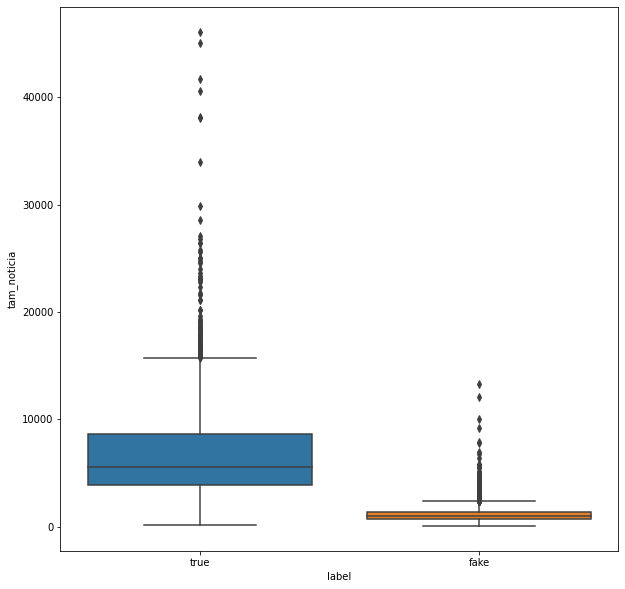

In [88]:
plt.subplots(figsize=(10, 10))
sns.boxplot(data=pd.concat([true,fake]),x="label",y="tam_noticia")
plt.show()

Aqui vemos que a media de tamanho para true new é de 6676 e para fake news é de 1124.<br/>
Com uma mediana de 5584 para true news e de fake news é 696

In [89]:
#Palavras com maiores frequencias de fake news ?
fake.head(5)

text    datetime  category  \
0  Kátia Abreu diz que vai colocar sua expulsão e...  2017-11-30  politica   
1  Dr. Ray peita Bolsonaro, chama-o de conservad...  2017-11-24  politica   
2  Reinaldo Azevedo desmascarado pela Polícia Fed...  2017-05-23  politica   
3  Relatório assustador do BNDES mostra dinheiro ...  24/07/2017  politica   
4  Radialista americano fala sobre o PT: "Eles ve...  25/07/2017  politica   

  label                                      clean_text_01        date  \
0  fake  kátia abreu diz que vai colocar sua expulsão e...  30/11/2017   
1  fake  dr ray peita bolsonaro chamao de conservador f...  24/11/2017   
2  fake  reinaldo azevedo desmascarado pela polícia fed...  23/05/2017   
3  fake  relatório assustador do bndes mostra dinheiro ...  24/07/2017   
4  fake  radialista americano fala sobre o pt eles vend...  25/07/2017   

    date_new date_analysis  mes  \
0 2017-11-30    2017-11-30   11   
1 2017-11-24    2017-11-24   11   
2 2017-05-23    2017-05-23    5   
3 2017-07-24    2017-07-24    7   
4 2017-07-25    2017-07-25    7   

                                       clean_text_02  tam_noticia  
0  kátia abreu diz vai colocar expulsão moldura r...         1035  
1  dr ray peita bolsonaro chamao conservador fake...         1507  
2  reinaldo azevedo desmascarado polícia federal ...         1658  
3  relatório assustador bndes mostra dinheiro púb...         3768  
4  radialista americano fala sobre pt vendem ilus...          666

In [90]:
word2count_fake = {}
for data in fake.clean_text_02:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count_fake.keys():
            word2count_fake[word] = 1
        else:
            word2count_fake[word] += 1

In [103]:
word2count_true = {}
for data in true.clean_text_02:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count_true.keys():
            word2count_true[word] = 1
        else:
            word2count_true[word] += 1

In [123]:
import heapq
freq_words_fake = heapq.nlargest(20, word2count_fake, key=word2count_fake.get)
freq_words_true = heapq.nlargest(20, word2count_true, key=word2count_true.get)

In [124]:
num_f = []
num_t = []

In [125]:
for i in freq_words_fake:
    num_f.append(word2count_fake.get(i))

for i in freq_words_true:
    num_t.append(word2count_true.get(i))

In [115]:
len(num_f)

10

In [126]:
d = {
    "nome": freq_words_fake,
    "frequencia":num_f
}

d_true = {
    "nome": freq_words_true,
    "frequencia":num_t
}

In [130]:
best_20_fake = pd.DataFrame(data=d)
best_20_true = pd.DataFrame(data=d_true)

In [131]:
best_20_true

nome  frequencia
0           lula        8783
1     presidente        8736
2          sobre        8296
3           anos        8187
4          disse        8180
5        federal        7651
6          ainda        7030
7        governo        6829
8        segundo        6781
9         brasil        5721
10         temer        5696
11           ter        5633
12           diz        5466
13        contra        4993
14       pessoas        4839
15  expresidente        4802
16          país        4756
17           ano        4740
18           dia        4724
19           vai        4457

In [132]:
best_20_fake

nome  frequencia
0           lula        3055
1          disse        2199
2          dilma        1863
3     presidente        1844
4         brasil        1413
5           país        1234
6        governo        1195
7          temer        1183
8        federal        1177
9          sobre        1130
10          anos        1093
11  expresidente        1087
12         ainda         954
13        contra         930
14      ministro         895
15           vai         893
16        acordo         891
17       durante         857
18          pode         852
19            pt         848

In [209]:
from wordcloud import WordCloud
import matplotlib
matplotlib.rcParams["figure.dpi"] = 600

In [ ]:


def show_wordcloud(data, stopwords = None, title = None):
    text = " ".join(word for word in data)

    wordcloud = WordCloud(stopwords = stopwords,
                          collocations=False,
                          width=1000, height=500,
                          max_font_size=200, 
                          background_color='white').generate(text)

    fig, ax = plt.subplots(figsize=(16,12))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()
    if title: 
        fig.suptitle(title, fontsize=30)
        fig.subplots_adjust(top=1)

    plt.imshow(wordcloud)

In [ ]:
# text = " ".join(frase for frase in true.clean_text_02)
# wordcloud = WordCloud(stopwords = stopwords,
#                           collocations=False,
#                           width=1000, height=500,
#                           max_font_size=200, 
#                           background_color='white').generate(text)

# fig, ax = plt.subplots(figsize=(16,12))
# ax.imshow(wordcloud, interpolation='bilinear')
# plt.title("Wordcloud true news")
# plt.show()

In [ ]:
# text = " ".join(frase for frase in fake.clean_text_02)
# wordcloud = WordCloud(stopwords = stopwords,
#                           collocations=False,
#                           width=1000, height=500,
#                           max_font_size=200, 
#                           background_color='white').generate(text)

# fig, ax = plt.subplots(figsize=(16,12))
# ax.imshow(wordcloud, interpolation='bilinear')
# plt.title("Wordcloud fake news")
# plt.show()

In [188]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

imagem = cv2.imread("../data/raw/imgs/bolsonaro.png")
rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
ret,mask = cv2.threshold(gray,250,255,cv2.THRESH_BINARY)

In [205]:
imagemL = cv2.imread("../data/raw/imgs/img2L.png")
rgbL = cv2.cvtColor(imagemL, cv2.COLOR_BGR2RGB)
grayL = cv2.cvtColor(imagemL, cv2.COLOR_RGB2GRAY)
ret,maskL = cv2.threshold(grayL,250,255,cv2.THRESH_BINARY)

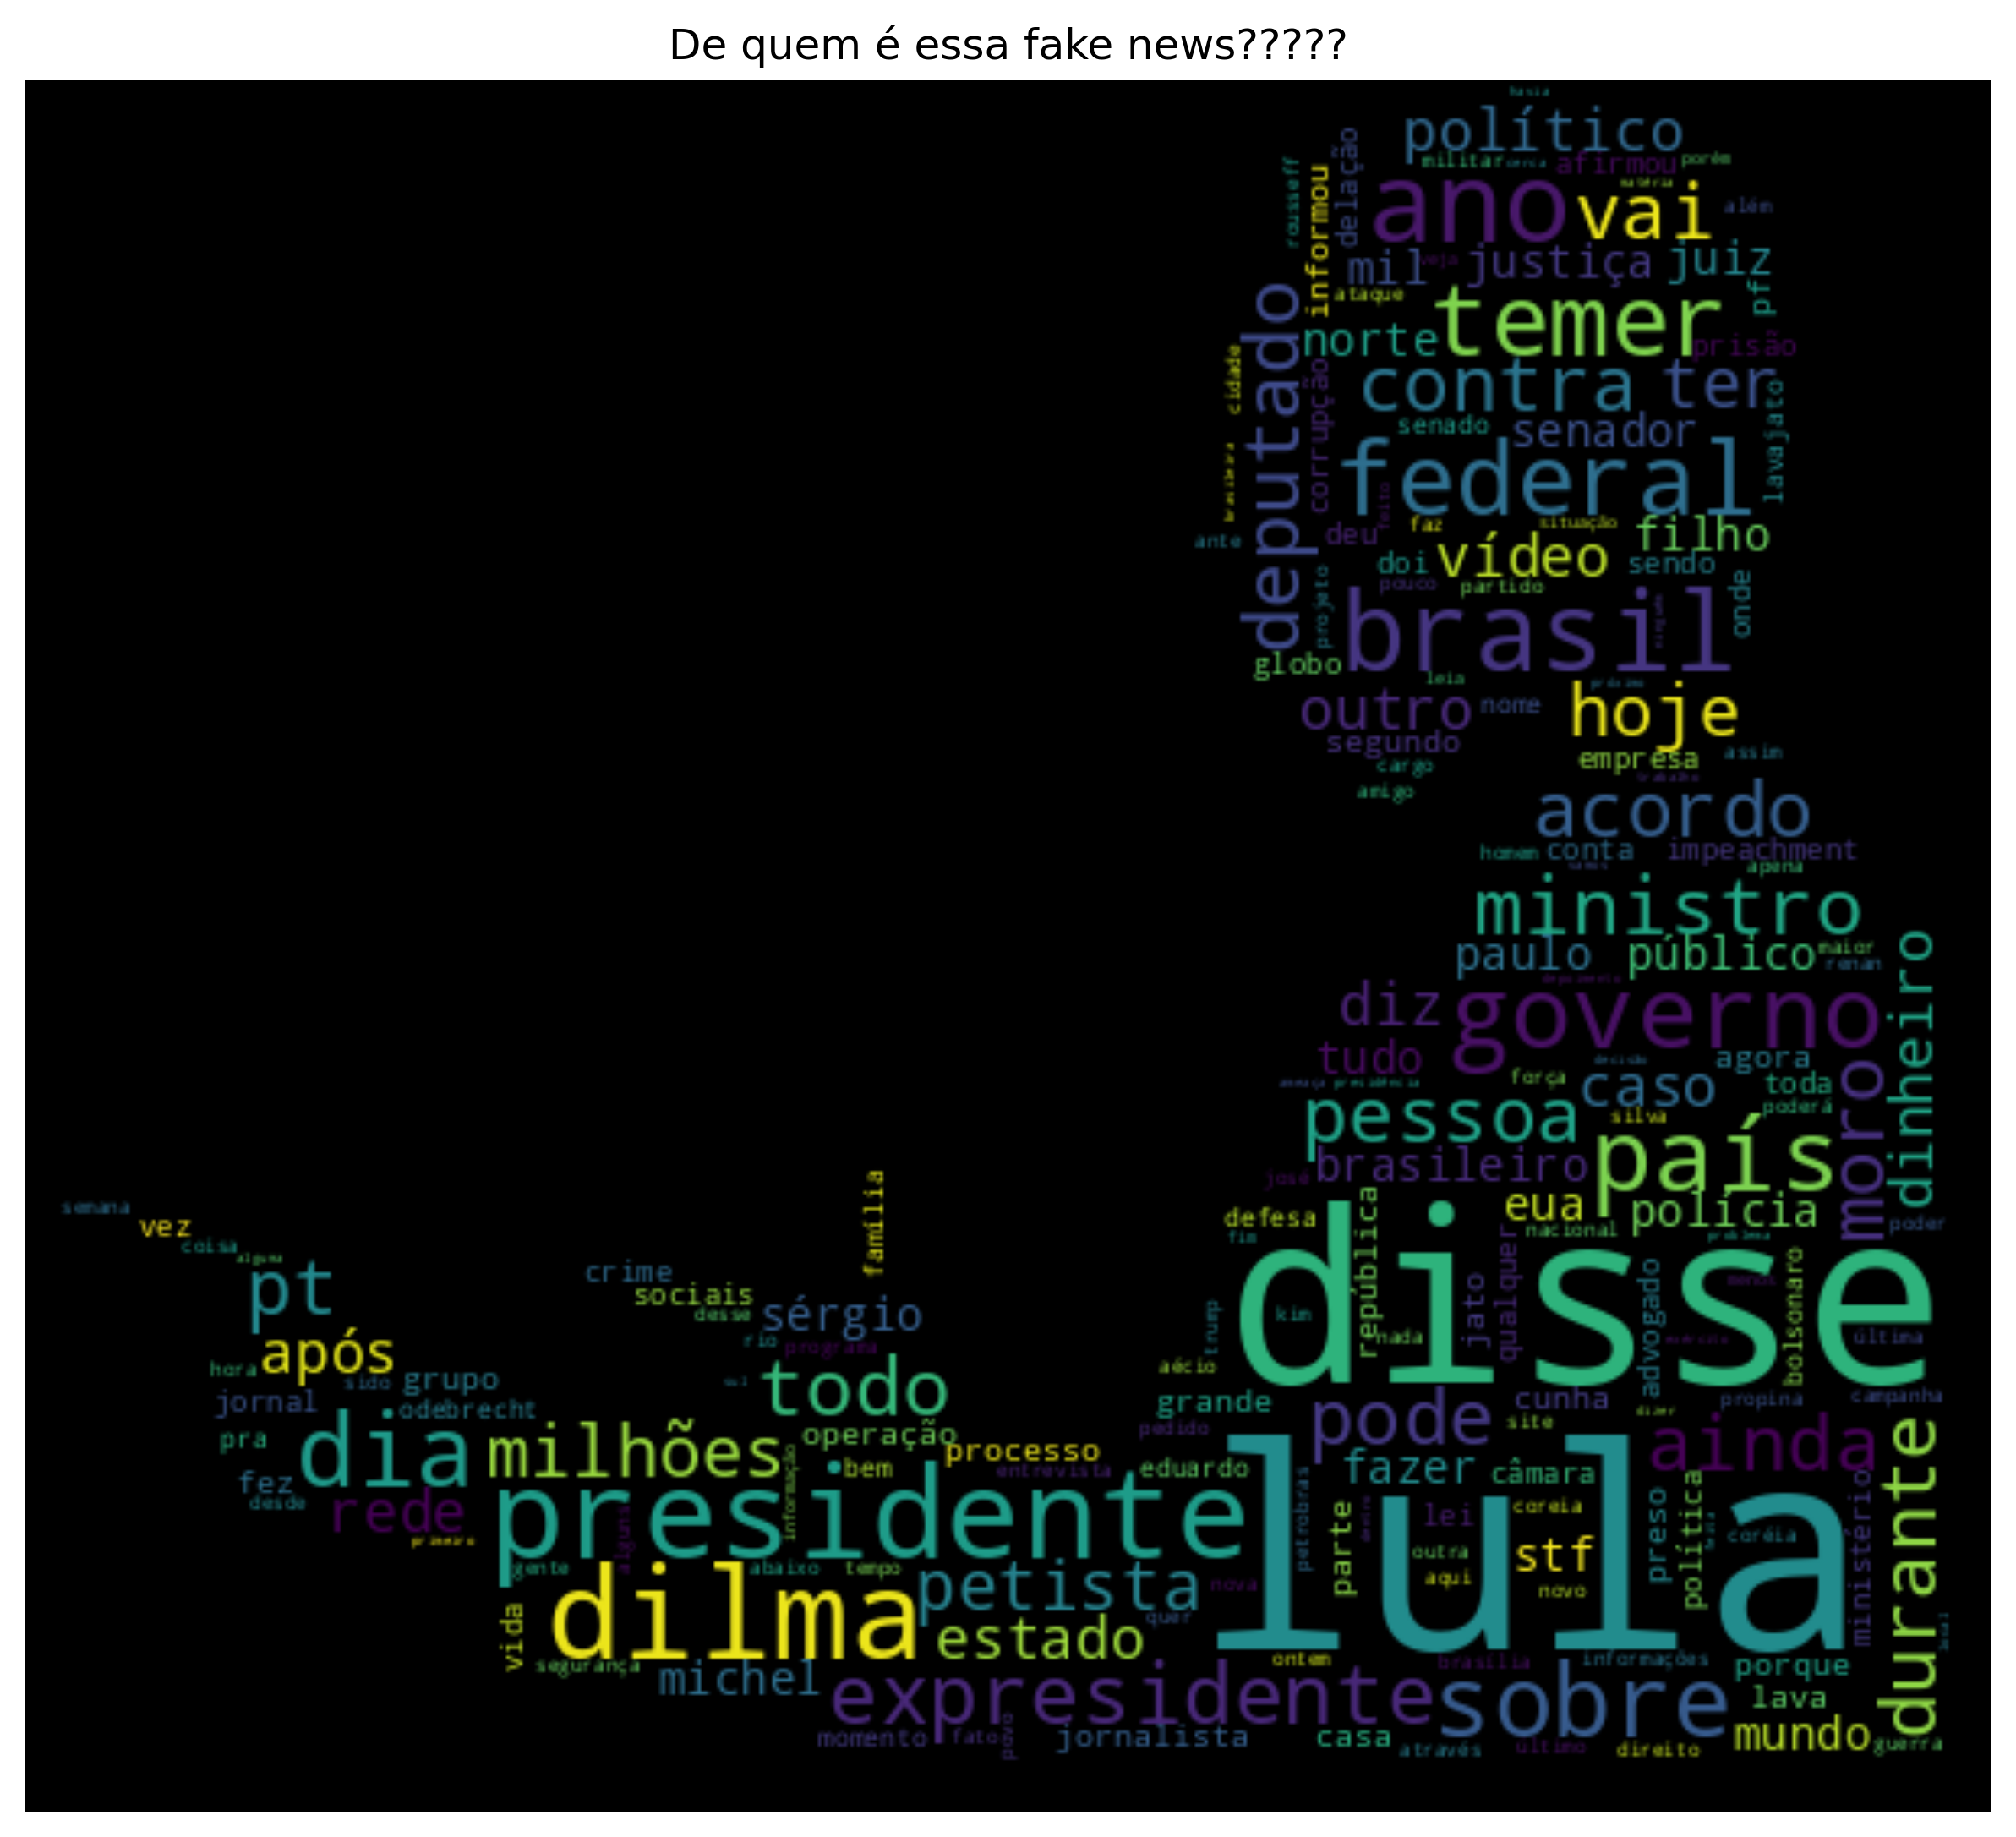

In [195]:
text = " ".join(frase for frase in fake.clean_text_02)
wordcloud_fake = WordCloud(background_color="black",width=2000, height=800, mask=mask, collocations = False).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title("De quem é essa fake news?????")
plt.axis("off")
plt.show()

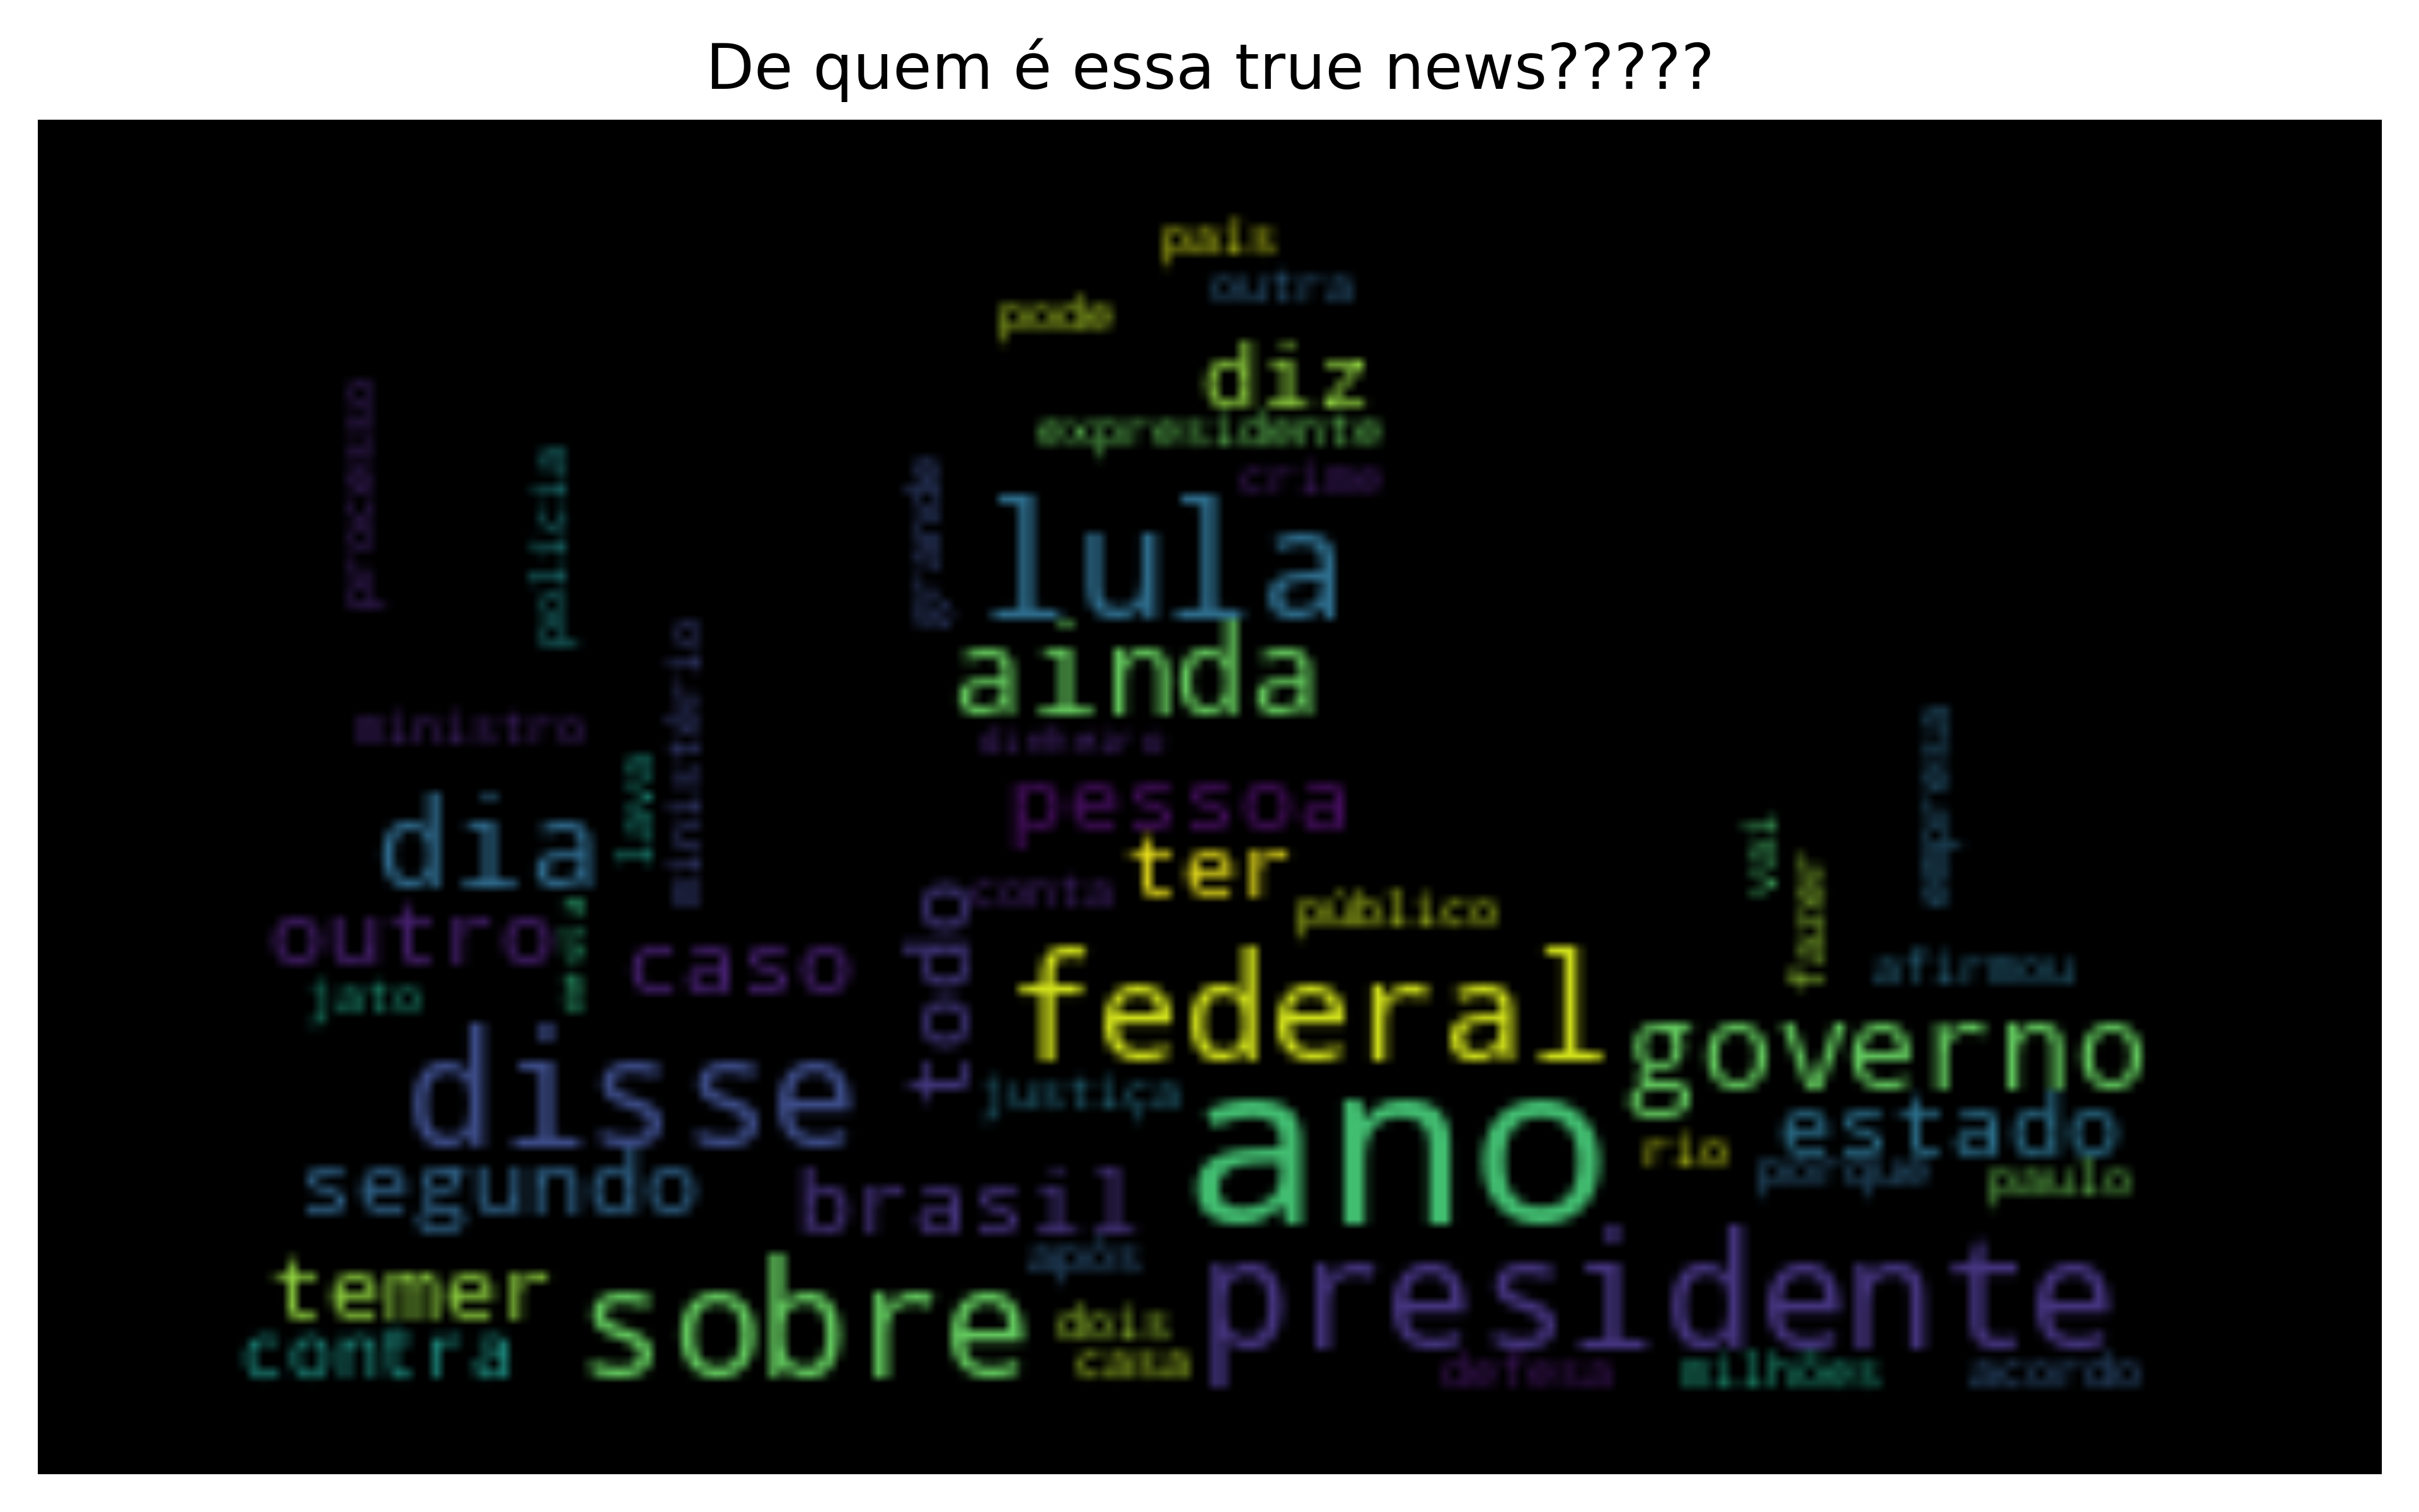

In [210]:
text = " ".join(frase for frase in true.clean_text_02)
wordcloud_true = WordCloud(background_color="black",width=2000, height=800, mask=maskL, collocations = False).generate(text)
fig = plt.figure(figsize=(8,8))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title("De quem é essa true news?????")
plt.axis("off")
plt.show()

## 3. Insights